In [ ]:
#https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68

In [1]:

import pandas as pd
import numpy as np
pd.__version__

'0.22.0'

In [2]:

df_row = pd.read_csv(r'C:\VIVEK\PROJECTS\ML\data\telecom_churn.csv')
df_row.head()

FileNotFoundError: File b'C:\\VIVEK\\PROJECTS\\ML\\data\\telecom_churn.csv' does not exist

In [6]:
url = "https://bigml.com/dashboard/dataset/5b16e20feba31d5eb70004da/download?format=csv"
#df_row_url = pd.read_csv(url)
#df_row_url.head()

In [4]:
df_row.shape
df_row.info()
df_row.describe()

NameError: name 'df_row' is not defined

In [29]:
df_row['Churn'].value_counts()



False    2850
True      483
Name: Churn, dtype: int64

In [32]:
df_row.apply(np.min)

State                        AK
Account length                1
Area code                   408
International plan           No
Voice mail plan              No
Number vmail messages         0
Total day minutes             0
Total day calls               0
Total day charge              0
Total eve minutes             0
Total eve calls               0
Total eve charge              0
Total night minutes        23.2
Total night calls            33
Total night charge         1.04
Total intl minutes            0
Total intl calls              0
Total intl charge             0
Customer service calls        0
Churn                     False
dtype: object

In [37]:
#apply
df_row[df_row['State'].apply(lambda x: x[0] == 'V')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
17,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
18,VA,76,510,No,Yes,33,189.7,66,32.25,212.8,65,18.09,165.7,108,7.46,10.0,5,2.70,1,False
24,VA,132,510,No,No,0,81.1,86,13.79,245.2,72,20.84,237.0,115,10.67,10.3,2,2.78,0,False
52,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
85,VT,128,510,No,Yes,29,179.3,104,30.48,225.9,86,19.20,323.0,78,14.54,8.6,7,2.32,0,False


In [41]:
#map
dict = {'No':'Bad','Yes':'Good'}
df_row['International plan'] = df_row['International plan'].map(dict)
df_row.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,Bad,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,Bad,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,Bad,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Good,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Good,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [50]:
df_row.groupby(by='State')['Total day minutes'].describe(percentiles=[]).head()

,count,mean,std,min,50%,max
State,,,,,,
AK,52.0,178.384615,49.640430,58.2,177.25,278.4
AL,80.0,186.010000,51.466249,68.7,190.25,308.0
AR,55.0,176.116364,50.368831,55.3,170.70,273.4
AZ,64.0,171.604688,51.941907,58.9,171.45,281.1
CA,34.0,183.564706,47.742484,92.8,183.20,280.0


In [56]:
pd.crosstab(df_row['State'],df_row['International plan']).head()

International plan,Bad,Good
State,,
AK,48,4
AL,72,8
AR,47,8
AZ,61,3
CA,30,4


In [57]:
pd.crosstab(df_row['Area code'],df_row['Voice mail plan']).head()

Voice mail plan,No,Yes
Area code,,
408,618,220
415,1184,471
510,609,231


In [65]:
df_row.insert(loc=len(df_row.columns),column='total',value=100)
df_row.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,100
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,100
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,100
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,100
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,100


In [68]:
pd.crosstab(df_row['Churn'],df_row['International plan'],margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


In [72]:
import matplotlib.pyplot as pt
import seaborn as sn

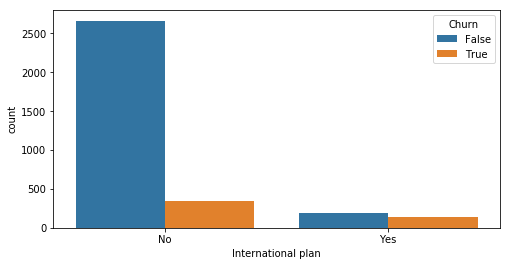

In [84]:
%matplotlib inline
pt.rcParams['figure.figsize'] = (8, 4)
sn.countplot(x='International plan', hue='Churn', data=df_row);

In [81]:
pd.crosstab(df_row['Churn'],df_row['Customer service calls'],margins=True)


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


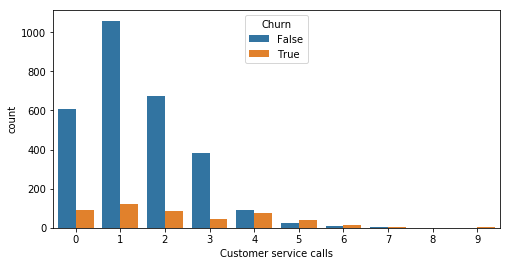

In [85]:
sn.countplot(x='Customer service calls',hue='Churn',data=df_row)

In [86]:
df_row['many service calls'] = (df_row['Customer service calls'] > 3).astype(int)

In [88]:
pd.crosstab(df_row['many service calls'],df_row['Churn'],margins=True)

Churn,False,True,All
many service calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


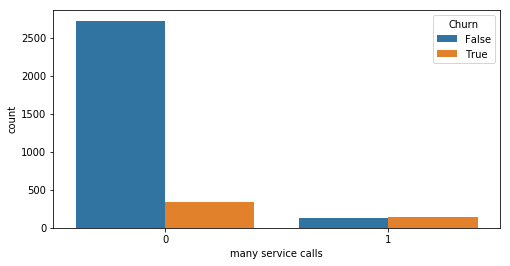

In [89]:
sn.countplot(x='many service calls',hue='Churn',data=df_row)

In [92]:
pd.crosstab(df_row['many service calls'] & df_row['International plan'],df_row['Churn'])

Churn,False,True
row_0,,
False,2721,345
True,129,138


In [ ]:
)